In [1]:
# lib's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [2]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
    layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [3]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy'])

# Preparing our data using data generator

In [4]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.2, 
#     shear_range = 0.2, 
    horizontal_flip=True, 
    rescale = 1./255
    )

train_data = train_datagen.flow_from_directory(
    directory= "train/train/", 
    target_size=(224,224), 
    batch_size=32,
    )

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [5]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(
    directory= "train/train/", 
    target_size=(224,224), 
    batch_size=32,
    )

Found 350 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

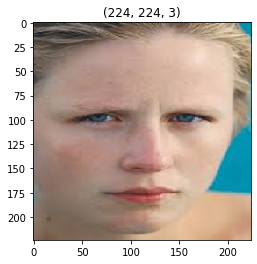

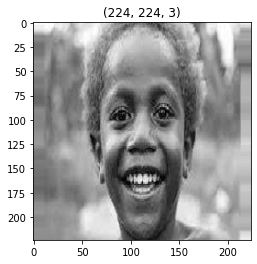

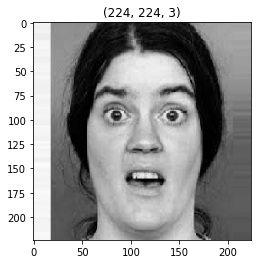

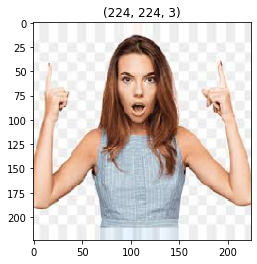

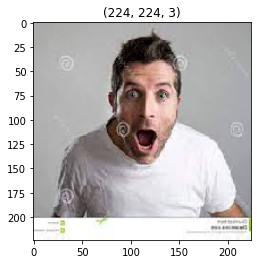

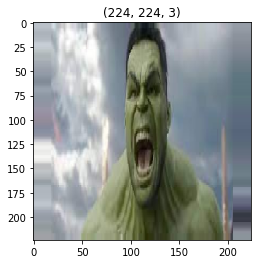

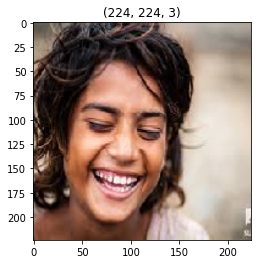

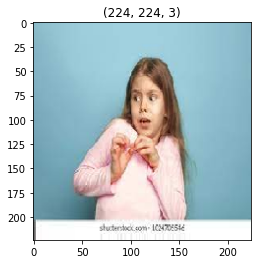

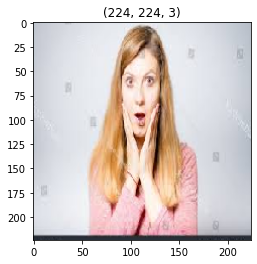

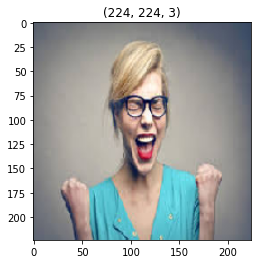

In [6]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
    """
    input  :- images array 
    output :- plots the images 
    """
    count = 0
    for im, l in zip(img_arr,label) :
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()

        count += 1
        if count == 10:
            break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [7]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_loss', min_delta= 0.01 , patience= 7, verbose= 1, mode='auto')
# 'val_accuracy'

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_loss', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [mc] # es, 

In [8]:
hist = model.fit_generator(
    train_data, 
    steps_per_epoch= 10, 
    epochs= 100, 
    validation_data= val_data, 
    validation_steps= 8, 
    callbacks=call_back
)

c:\users\munge\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 29s 3s/step - loss: 8.7647 - accuracy: 0.2490 - val_loss: 2.8224 - val_accuracy: 0.5586

Epoch 00001: val_loss improved from inf to 2.82244, saving model to best_model.h5
Epoch 2/100
10/10 [==============================] - 25s 3s/step - loss: 3.1573 - accuracy: 0.5657 - val_loss: 2.0476 - val_accuracy: 0.6719

Epoch 00002: val_loss improved from 2.82244 to 2.04758, saving model to best_model.h5
Epoch 3/100
10/10 [==============================] - 26s 3s/step - loss: 2.3047 - accuracy: 0.6493 - val_loss: 0.8921 - val_accuracy: 0.8320

Epoch 00003: val_loss improved from 2.04758 to 0.89209, saving model to best_model.h5
Epoch 4/100
10/10 [==============================] - 29s 3s/step - loss: 0.9781 - accuracy: 0.8173 - val_loss: 0.2655 - val_accuracy: 0.9336

Epoch 00004: val_loss improved from 0.89209 to 0.26547, saving model to best_model.h5
Epoch 5/100
10/10 [==============================] - 24s 3s/step - loss: 0.3311 - accuracy: 


Epoch 00082: val_loss did not improve from 0.00002
Epoch 83/100
10/10 [==============================] - 32s 3s/step - loss: 0.3002 - accuracy: 0.9661 - val_loss: 0.1768 - val_accuracy: 0.9609

Epoch 00083: val_loss did not improve from 0.00002
Epoch 84/100
10/10 [==============================] - 32s 3s/step - loss: 0.2221 - accuracy: 0.9648 - val_loss: 0.0192 - val_accuracy: 0.9922

Epoch 00084: val_loss did not improve from 0.00002
Epoch 85/100
10/10 [==============================] - 35s 4s/step - loss: 0.1644 - accuracy: 0.9590 - val_loss: 0.2294 - val_accuracy: 0.9727

Epoch 00085: val_loss did not improve from 0.00002
Epoch 86/100
10/10 [==============================] - 33s 3s/step - loss: 0.1243 - accuracy: 0.9675 - val_loss: 0.1471 - val_accuracy: 0.9805

Epoch 00086: val_loss did not improve from 0.00002
Epoch 87/100
10/10 [==============================] - 32s 3s/step - loss: 0.1958 - accuracy: 0.9700 - val_loss: 0.0217 - val_accuracy: 0.9922

Epoch 00087: val_loss did not

In [9]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("best_model.h5")

In [10]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

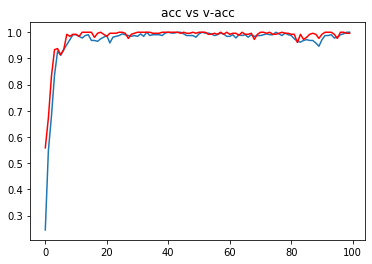

In [11]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

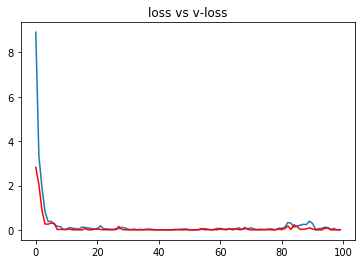

In [12]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [13]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
op

{0: 'Angry',
 1: 'Disguist',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

 the image is of Angry


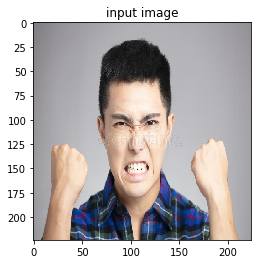

In [14]:
# path for the image to see if it predics correct class

path = "new.jpg" # "mann.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()